In [10]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

ubuntu_colors = ["#E95420", "#77216F", "#5E2750", "#2C001E", "#AEA79F"]
sns.set_palette(ubuntu_colors)

df = pd.read_csv('climate.csv')


In [11]:
#%% DATA INSPECTION - "Understanding Our Community"
print("="*55)
print("STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)")
print("="*55)

STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)


In [12]:
# data exploration
print(f"\n📊 Dataset Shape: {df.shape}")
print("\n🧾 First 5 Rows:")
display(df.head())


📊 Dataset Shape: (225, 72)

🧾 First 5 Rows:


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [18]:
import pandas as pd

df = pd.read_csv('climate.csv')

# Now call describe() on the DataFrame
print(df.describe())
# Missing information
print (df.isnull().sum())

         ObjectId       F1961       F1962       F1963       F1964       F1965  \
count  225.000000  188.000000  189.000000  188.000000  188.000000  188.000000   
mean   113.000000    0.163053   -0.013476   -0.006043   -0.070059   -0.247027   
std     65.096083    0.405080    0.341812    0.387348    0.309305    0.270734   
min      1.000000   -0.694000   -0.908000   -1.270000   -0.877000   -1.064000   
25%     57.000000   -0.097000   -0.164000   -0.205500   -0.236500   -0.392500   
50%    113.000000    0.064500   -0.056000   -0.003000   -0.056000   -0.230500   
75%    169.000000    0.318500    0.114000    0.230500    0.132500   -0.091500   
max    225.000000    1.892000    0.998000    1.202000    1.097000    0.857000   

            F1966       F1967       F1968       F1969  ...       F2013  \
count  192.000000  191.000000  191.000000  190.000000  ...  216.000000   
mean     0.105505   -0.110832   -0.199110    0.157942  ...    0.931199   
std      0.378423    0.339484    0.270131    0.3

In [22]:
# filling missing data
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df['ISO2'] = df['ISO2'].fillna('Unknown')
print (df.isnull().sum())

ObjectId     0
Country      0
ISO2         0
ISO3         0
Indicator    0
            ..
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
Length: 72, dtype: int64


In [27]:
# Data exploration
print("\n" + "="*55)
print("  step 2:DATA CLEANING(Ubuntu: Data Exploration)")
print("="*55)


  step 2:DATA CLEANING(Ubuntu: Data Exploration)


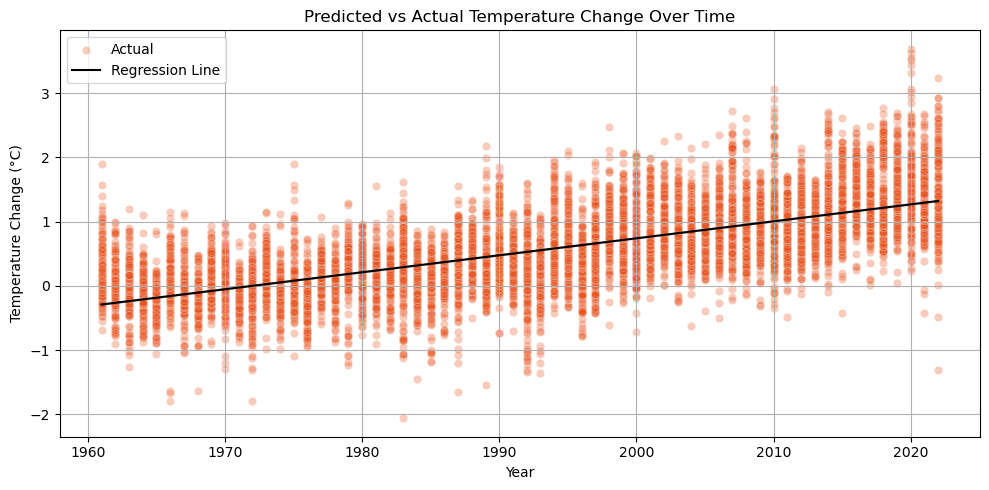

In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df_long = df.melt(id_vars=['Country', 'ISO3'], var_name='Year', value_name='Temp_Change')

# Extract numeric year and handle NaNs safely
df_long['Year'] = df_long['Year'].str.extract(r'F(\d+)', expand=False)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')  # returns float if NaN exists

# Convert Temp_Change to numeric
df_long['Temp_Change'] = pd.to_numeric(df_long['Temp_Change'], errors='coerce')

df_long = df_long.dropna(subset=['Year', 'Temp_Change'])

# features and target
X = df_long[['Year']]
y = df_long['Temp_Change']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


# actual vs. predicted
df_long['Predicted'] = model.predict(df_long[['Year']])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_long, x='Year', y='Temp_Change', alpha=0.3, label='Actual')
sns.lineplot(data=df_long, x='Year', y='Predicted', color='black', label='Regression Line')
plt.title('Predicted vs Actual Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv('climate.csv')
# Load data

# Reshape data
meta_cols = ['Country', 'ISO3', 'Indicator']
year_cols = [col for col in df.columns if col.startswith('F')]
df_filtered = df[meta_cols + year_cols]
df_long = df_filtered.melt(id_vars=meta_cols, var_name='Year', value_name='Temp_Change')

# Handle NaN values before conversion to int
df_long['Year'] = df_long['Year'].str.extract(r'F(\d+)', expand=False)
# Convert to integer only where values are not NaN
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce').astype('Int64')  # Int64 allows NaN values

# Country classification
developed_countries = {
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
    'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
    'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand',
    'Norway', 'Portugal', 'Singapore', 'South Korea', 'Spain', 'Sweden',
    'Switzerland', 'United Kingdom', 'United States'
}
low_income_countries = {
    'Afghanistan, Islamic Rep. of', 'Benin', 'Burkina Faso', 'Burundi', 'Central African Republic',
    'Chad', 'Comoros', 'Congo, Dem. Rep. of the', 'Eritrea', 'Ethiopia, The Federal Dem. Rep. of',
    'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Liberia', 'Madagascar',
    'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Sierra Leone', 'Somalia',
    'South Sudan', 'Sudan', 'Togo', 'Uganda', 'Zambia'
}
def classify_country(country):
    if country in developed_countries:
        return 'Developed'
    elif country in low_income_countries:
        return 'Low Income'
    else:
        return 'Developing'

df_long['Development_Status'] = df_long['Country'].apply(classify_country)


# Count of total unique countries
total_countries = df_long['Country'].nunique()

# Count of countries by development status (unique)
country_status_counts = df_long[['Country', 'Development_Status']].drop_duplicates()
grouped_counts = country_status_counts['Development_Status'].value_counts()

# Summary combination
summary = grouped_counts.to_frame(name='Country Count')
summary.loc['Total'] = total_countries

print("Country Classification Summary:")
print(summary)

Country Classification Summary:
                    Country Count
Development_Status               
Developing                    180
Developed                      24
Low Income                     21
Total                         225


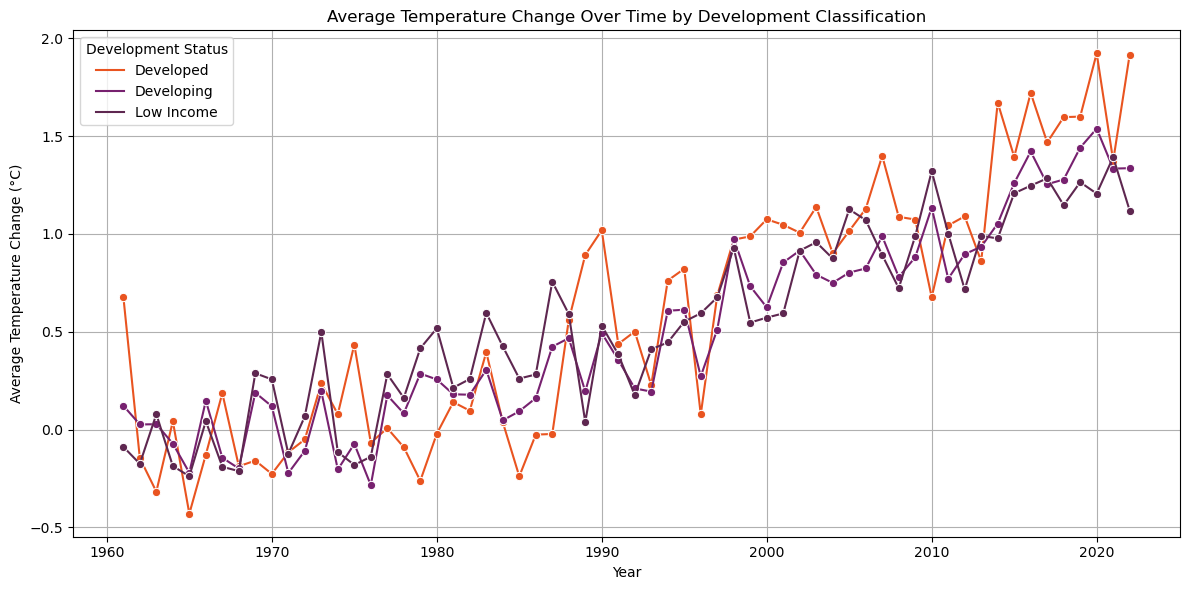

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
summary['Year'] = pd.to_numeric(summary['Year'], errors='coerce')
summary['Temp_Change'] = pd.to_numeric(summary['Temp_Change'], errors='coerce')
summary = summary.dropna(subset=['Year', 'Temp_Change'])

summary['Year'] = summary['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=summary,
    x='Year',
    y='Temp_Change',
    hue='Development_Status',
    marker='o',
    errorbar=None  # The error bars are disabled to avoid fill between issues
)
plt.title('Average Temperature Change Over Time by Development Classification')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.grid(True)
plt.legend(title='Development Status')
plt.tight_layout()
plt.show()


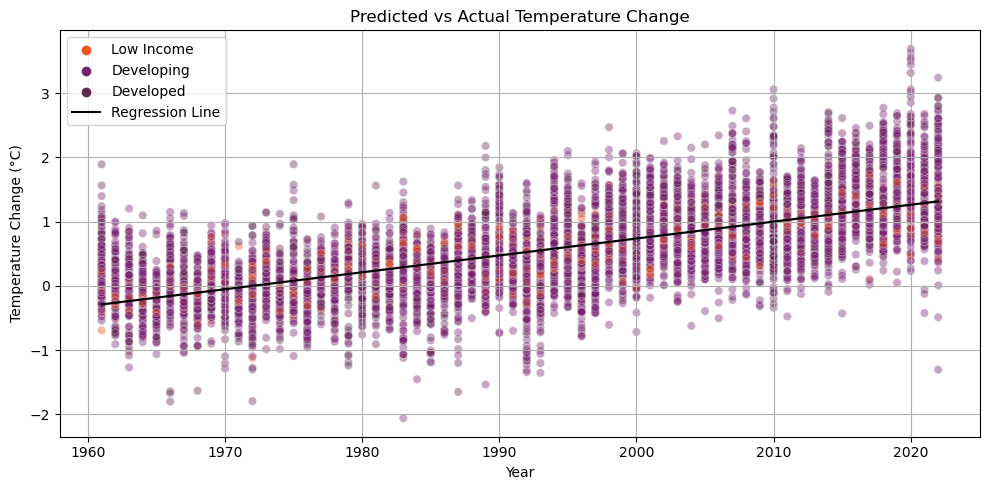

In [56]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_model = df_long.dropna(subset=['Temp_Change']).copy()

df_model['Development_Status'] = df_model['Development_Status'].astype(str)
# mapping dictionary
status_map = {'Developed': 2, 'Developing': 1, 'Low Income': 0}
# Apply mapping and handle any unexpected values
df_model['Dev_Status_Num'] = df_model['Development_Status'].apply(lambda x: status_map.get(x, np.nan))

# Ensure Year and Temp_Change are numeric
df_model['Year'] = pd.to_numeric(df_model['Year'], errors='coerce')
df_model['Temp_Change'] = pd.to_numeric(df_model['Temp_Change'], errors='coerce')

# Drop any rows with NaN values after conversion
df_model = df_model.dropna(subset=['Year', 'Temp_Change', 'Dev_Status_Num'])

# Explicitly convert columns to float before creating arrays
df_model['Year'] = df_model['Year'].astype(float)
df_model['Dev_Status_Num'] = df_model['Dev_Status_Num'].astype(float)
df_model['Temp_Change'] = df_model['Temp_Change'].astype(float)

# Create feature matrix and target vector
X = df_model[['Year', 'Dev_Status_Num']].values
y = df_model['Temp_Change'].values

# Fit the model
model = LinearRegression()
model.fit(X, y)
df_model['Predicted_Change'] = model.predict(X)

# Create the plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_model, x='Year', y='Temp_Change', hue='Development_Status', alpha=0.4)
sns.lineplot(data=df_model, x='Year', y='Predicted_Change', color='black', label='Regression Line')
plt.title('Predicted vs Actual Temperature Change')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

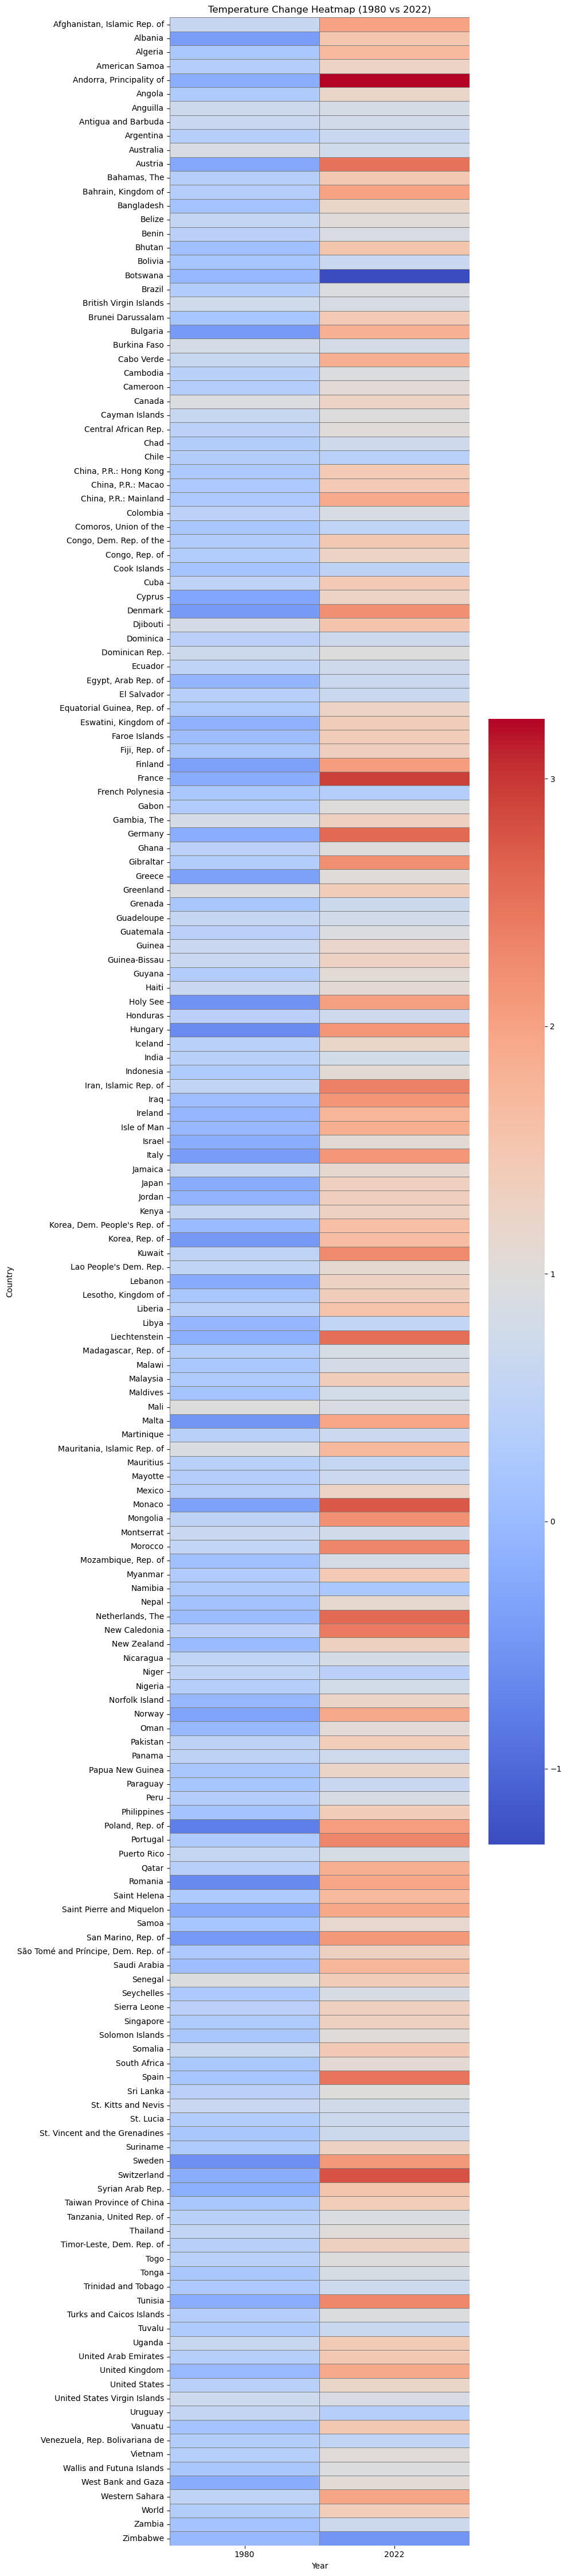

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("climate.csv")

# Extract relevant columns
columns_needed = ['Country', 'ISO3', 'F1980', 'F2022']
df_subset = df[columns_needed].copy()

# Rename for clarity
df_subset.columns = ['Country', 'ISO3', '1980', '2022']

# Drop rows with missing values
df_subset = df_subset.dropna(subset=['1980', '2022'])

# Set country as index for heatmap
df_heat = df_subset.set_index('Country')[['1980', '2022']]

# Create the heatmap
plt.figure(figsize=(10, len(df_heat)//4))
sns.heatmap(df_heat, cmap='coolwarm', annot=False, linewidths=0.5, linecolor='gray')
plt.title('Temperature Change Heatmap (1980 vs 2022)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [82]:
# Final dataset preview
print("\n Preprocessed Data Ready for Modeling:")
display(df.head())



 Preprocessed Data Ready for Modeling:


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
